In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## 1. Read the Data

In [2]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sign Language/sign_mnist_train.csv')
print(train.shape)
train.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


The training dataset is of size (27455, 785) with one target variable column and remaining 784 columns as pixels. Hence, each image is of 784 pixels.

In [3]:
train_images = train.iloc[:,1:]
train_labels = train.iloc[:,0]

print(train_images.shape, train_labels.shape)

(27455, 784) (27455,)


In [4]:
#Convert into array
train_images = train_images.values
train_labels = train_labels.values

#Reshape the training images to 27455 X 28 X 28 (solely for visualization purposes)
train_images = train_images.reshape(27455, 28, 28)

In [5]:
class_names = []
for i in range(65,91): 
  ''' Store the alphabets in class_names variable.
  Since J and Z require motion in ASL and currently not possible, the characters are ignored.
  In other words, they are replaced with blank value.'''
  blank = ''
  if(chr(i)=='J' or chr(i)=='Z'):
    class_names.append(blank)
  else:
    class_names.append(chr(i))
  
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', '', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', '']


## 2. Explore the Data

In [6]:
train_images.shape

(27455, 28, 28)

In [7]:
len(train_labels)

27455

In [8]:
train_labels

array([ 3,  6,  2, ..., 18, 17, 23])

## 3. Preprocess the Data

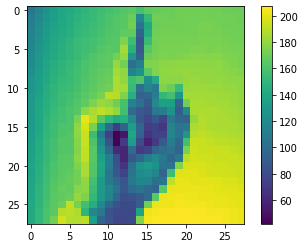

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#Preprocess the images
train_images = train_images / 255.0

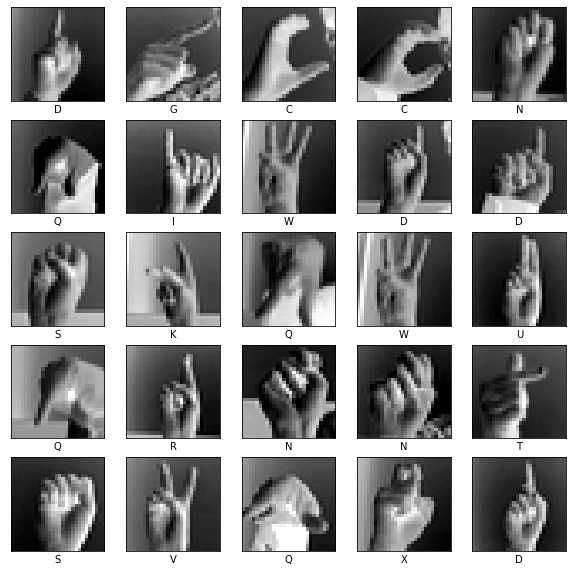

In [11]:
#Display the first 25 images from training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4. Build Small Model

### 4.1 Setup the Layers

Let's create a very simple small model for now to see how it performs

In [12]:
small_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 27,455 x 28 x 28 to 27,455 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(25, activation='softmax')
])

### 4.2 Compile the Model

Let's use Adam optimizer

In [13]:
small_model.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

## 5. Train the Small Model

### 5.1 Feed the Model

In [14]:
history_small = small_model.fit(train_images, train_labels, batch_size=500, epochs=25, validation_split=0.2)

Epoch 1/25
44/44 [==============================] - 0s 11ms/step - loss: 3.1715 - accuracy: 0.1233 - val_loss: 3.1307 - val_accuracy: 0.1679
Epoch 2/25
44/44 [==============================] - 0s 7ms/step - loss: 3.1210 - accuracy: 0.1806 - val_loss: 3.0838 - val_accuracy: 0.2298
Epoch 3/25
44/44 [==============================] - 0s 7ms/step - loss: 3.0889 - accuracy: 0.2093 - val_loss: 3.0661 - val_accuracy: 0.2293
Epoch 4/25
44/44 [==============================] - 0s 7ms/step - loss: 3.0722 - accuracy: 0.2210 - val_loss: 3.0515 - val_accuracy: 0.2402
Epoch 5/25
44/44 [==============================] - 0s 7ms/step - loss: 3.0643 - accuracy: 0.2261 - val_loss: 3.0485 - val_accuracy: 0.2404
Epoch 6/25
44/44 [==============================] - 0s 7ms/step - loss: 3.0589 - accuracy: 0.2298 - val_loss: 3.0426 - val_accuracy: 0.2468
Epoch 7/25
44/44 [==============================] - 0s 8ms/step - loss: 3.0515 - accuracy: 0.2393 - val_loss: 3.0308 - val_accuracy: 0.2710
Epoch 8/25
44/44 [=

In [15]:
print('Small Model Training Accuracy:',round(history_small.history['accuracy'][-1]*100,2))

Small Model Training Accuracy: 40.17


## 6. Build Medium Model

### 6.1 Setup the Layers

Let's create a medium model for now to see how it performs

In [16]:
med_model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 27,455 x 28 x 28 to 27,455 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(25, activation='softmax')
])

### 6.2 Compile the Model

Let's use Adam optimizer

In [17]:
med_model_1.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

## 7. Train the Medium Model

### 7.1 Feed the Model (# 1)

In [18]:
history_med_1 = med_model_1.fit(train_images, train_labels, batch_size=500, epochs=30, validation_split=0.2)

Epoch 1/30
44/44 [==============================] - 0s 11ms/step - loss: 3.1866 - accuracy: 0.0991 - val_loss: 3.1292 - val_accuracy: 0.1909
Epoch 2/30
44/44 [==============================] - 0s 9ms/step - loss: 3.0886 - accuracy: 0.2250 - val_loss: 3.0320 - val_accuracy: 0.2899
Epoch 3/30
44/44 [==============================] - 0s 9ms/step - loss: 3.0069 - accuracy: 0.3168 - val_loss: 2.9641 - val_accuracy: 0.3571
Epoch 4/30
44/44 [==============================] - 0s 9ms/step - loss: 2.9582 - accuracy: 0.3556 - val_loss: 2.9332 - val_accuracy: 0.3773
Epoch 5/30
44/44 [==============================] - 0s 9ms/step - loss: 2.9294 - accuracy: 0.3819 - val_loss: 2.9025 - val_accuracy: 0.4094
Epoch 6/30
44/44 [==============================] - 0s 9ms/step - loss: 2.9053 - accuracy: 0.4050 - val_loss: 2.8839 - val_accuracy: 0.4282
Epoch 7/30
44/44 [==============================] - 0s 9ms/step - loss: 2.8775 - accuracy: 0.4346 - val_loss: 2.8466 - val_accuracy: 0.4662
Epoch 8/30
44/44 [=

In [19]:
print('Medium Model 1 Training Accuracy:',round(history_med_1.history['accuracy'][-1]*100,2))

Medium Model 1 Training Accuracy: 62.78


## 8. Build Medium Model (#2)

### 8.1 Setup the Layers

Let's create another medium model for now to see how it performs

In [20]:
med_model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 27,455 x 28 x 28 to 27,455 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(25, activation='softmax')
])

### 8.2 Compile the Model

Let's use Adam optimizer

In [21]:
med_model_2.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

## 9. Train the Medium Model (#2)

### 9.1 Feed the Model

In [22]:
history_med_2 = med_model_2.fit(train_images, train_labels, batch_size=500, epochs=35, validation_split=0.2)

Epoch 1/35
44/44 [==============================] - 1s 12ms/step - loss: 3.1906 - accuracy: 0.0912 - val_loss: 3.1456 - val_accuracy: 0.1597
Epoch 2/35
44/44 [==============================] - 0s 9ms/step - loss: 3.1122 - accuracy: 0.1899 - val_loss: 3.0730 - val_accuracy: 0.2215
Epoch 3/35
44/44 [==============================] - 0s 10ms/step - loss: 3.0610 - accuracy: 0.2337 - val_loss: 3.0381 - val_accuracy: 0.2561
Epoch 4/35
44/44 [==============================] - 0s 9ms/step - loss: 3.0180 - accuracy: 0.2853 - val_loss: 2.9893 - val_accuracy: 0.3074
Epoch 5/35
44/44 [==============================] - 0s 9ms/step - loss: 2.9807 - accuracy: 0.3217 - val_loss: 2.9435 - val_accuracy: 0.3593
Epoch 6/35
44/44 [==============================] - 0s 9ms/step - loss: 2.9479 - accuracy: 0.3520 - val_loss: 2.9284 - val_accuracy: 0.3697
Epoch 7/35
44/44 [==============================] - 0s 10ms/step - loss: 2.9309 - accuracy: 0.3654 - val_loss: 2.9148 - val_accuracy: 0.3799
Epoch 8/35
44/44 

In [23]:
print('Medium Model 2 Training Accuracy:',round(history_med_2.history['accuracy'][-1]*100,2))

Medium Model 2 Training Accuracy: 44.85


## 10. Build Medium Model (#3)

### 10.1 Setup the Layers

Let's create another medium model for now to see how it performs

In [24]:
med_model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 27,455 x 28 x 28 to 27,455 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(25, activation='softmax')
])

### 10.2 Compile the Model

Let's use Adam optimizer

In [25]:
med_model_3.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

## 11. Train the Medium Model (#3)

### 11.1 Feed the Model

In [26]:
history_med_3 = med_model_3.fit(train_images, train_labels, batch_size=500, epochs=40, validation_split=0.2)

Epoch 1/40
44/44 [==============================] - 1s 14ms/step - loss: 3.1847 - accuracy: 0.1017 - val_loss: 3.1231 - val_accuracy: 0.1754
Epoch 2/40
44/44 [==============================] - 0s 11ms/step - loss: 3.0924 - accuracy: 0.2057 - val_loss: 3.0531 - val_accuracy: 0.2440
Epoch 3/40
44/44 [==============================] - 1s 12ms/step - loss: 3.0281 - accuracy: 0.2705 - val_loss: 2.9863 - val_accuracy: 0.3191
Epoch 4/40
44/44 [==============================] - 0s 11ms/step - loss: 2.9696 - accuracy: 0.3310 - val_loss: 2.9404 - val_accuracy: 0.3591
Epoch 5/40
44/44 [==============================] - 1s 12ms/step - loss: 2.9276 - accuracy: 0.3713 - val_loss: 2.9131 - val_accuracy: 0.3814
Epoch 6/40
44/44 [==============================] - 0s 11ms/step - loss: 2.8993 - accuracy: 0.3987 - val_loss: 2.9011 - val_accuracy: 0.3939
Epoch 7/40
44/44 [==============================] - 0s 11ms/step - loss: 2.8783 - accuracy: 0.4157 - val_loss: 2.8679 - val_accuracy: 0.4254
Epoch 8/40
44

In [28]:
print('Medium Model 3 Training Accuracy:',round(history_med_3.history['accuracy'][-1]*100,2))

Medium Model 3 Training Accuracy: 50.76


## 12. Build Medium Model (#4)

### 12.1 Setup the Layers

Let's create another medium model for now to see how it performs

In [29]:
med_model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 27,455 x 28 x 28 to 27,455 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(25, activation='softmax')
])

### 12.2 Compile the Model

Let's use Adam optimizer

In [30]:
med_model_4.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

## 13. Train the Medium Model (#4)

### 13.1 Feed the Model

In [31]:
history_med_4 = med_model_4.fit(train_images, train_labels, batch_size=500, epochs=40, validation_split=0.2)

Epoch 1/40
44/44 [==============================] - 1s 16ms/step - loss: 3.1798 - accuracy: 0.0988 - val_loss: 3.1328 - val_accuracy: 0.1539
Epoch 2/40
44/44 [==============================] - 1s 13ms/step - loss: 3.1091 - accuracy: 0.1773 - val_loss: 3.0881 - val_accuracy: 0.2018
Epoch 3/40
44/44 [==============================] - 1s 13ms/step - loss: 3.0729 - accuracy: 0.2169 - val_loss: 3.0481 - val_accuracy: 0.2475
Epoch 4/40
44/44 [==============================] - 1s 13ms/step - loss: 3.0315 - accuracy: 0.2558 - val_loss: 3.0037 - val_accuracy: 0.2877
Epoch 5/40
44/44 [==============================] - 1s 13ms/step - loss: 2.9947 - accuracy: 0.2961 - val_loss: 2.9815 - val_accuracy: 0.3036
Epoch 6/40
44/44 [==============================] - 1s 13ms/step - loss: 2.9651 - accuracy: 0.3261 - val_loss: 2.9496 - val_accuracy: 0.3431
Epoch 7/40
44/44 [==============================] - 1s 13ms/step - loss: 2.9311 - accuracy: 0.3622 - val_loss: 2.9175 - val_accuracy: 0.3753
Epoch 8/40
44

In [32]:
print('Medium Model 4 Training Accuracy:',round(history_med_4.history['accuracy'][-1]*100,2))

Medium Model 4 Training Accuracy: 57.44


## 14. Visualize the 5 models

Text(0, 0.5, 'Accuracy')

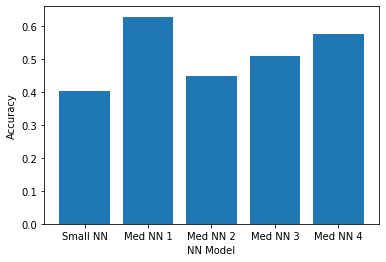

In [44]:
accuracies = [history_small.history['accuracy'][-1], history_med_1.history['accuracy'][-1], history_med_2.history['accuracy'][-1], history_med_3.history['accuracy'][-1], history_med_4.history['accuracy'][-1]]

plt.bar(range(1,len(accuracies)+1), height=accuracies)
plt.xticks(range(1,len(accuracies)+1), labels=('Small NN', 'Med NN 1', 'Med NN 2', 'Med NN 3', 'Med NN 4'))
plt.xlabel('NN Model')
plt.ylabel('Accuracy')

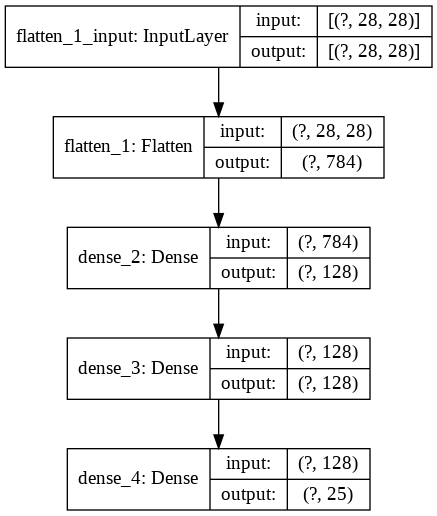

In [49]:
tf.keras.utils.plot_model(
    med_model_1,
    to_file="model.png",
    show_shapes=True,
    #show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)